# ...

...<br>

Author(s): *Martin Fränzl*

## Required Packages

In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('../')
#from trackerlab import readers, detectors

#import importlib
#importlib.reload(trackerlab)

In [2]:
from trackerlab import detectors

In [3]:
from trackerlab import readers

In [12]:
import json 
plt.rcParams.update(json.load(open('plotstyle.json')))

In [13]:
images, metadata = readers.read_tdms_video("../sample_data/Test_001_movie.tdms")

In [14]:
#exposure = metadata["exposure"]
#binning = metadata["binning"]

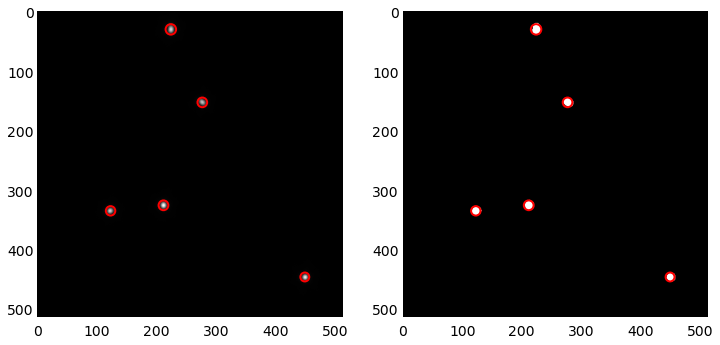

In [15]:
frame = 0
threshold = 1000
min_area = 5
max_area = 250
max_features = 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

features, threshold_image = detectors.connected_components(images[frame], threshold, min_area, max_area, max_features)

ax1.imshow(images[frame], cmap='gray')
ax2.imshow(threshold_image, cmap='gray')

for idx, f in features.iterrows():
    ax1.add_patch(plt.Circle((f['x'], f['y']), np.sqrt(f['area']/np.pi), fill=False, ec='r', lw=2))
    ax2.add_patch(plt.Circle((f['x'], f['y']), np.sqrt(f['area']/np.pi), fill=False, ec='r', lw=2))


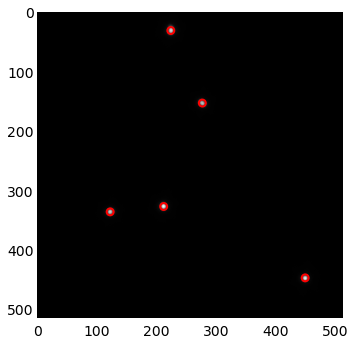

In [16]:
frame = 0
threshold = 0.1
max_sigma = 5

fig, ax = plt.subplots(1, 1, figsize=(6,5.6))

ax.imshow(images[frame], cmap='gray')
features, _ = detectors.difference_of_gaussians(images[frame], max_sigma=max_sigma, threshold=threshold)

for idx, f in features.iterrows():
    ax.add_patch(plt.Circle((f['x'], f['y']), np.sqrt(f['area']/np.pi), fill=False, ec='r', lw=2))

In [17]:
images, metadata = readers.read_tdms_video("../sample_data/Test_005_movie.tdms")

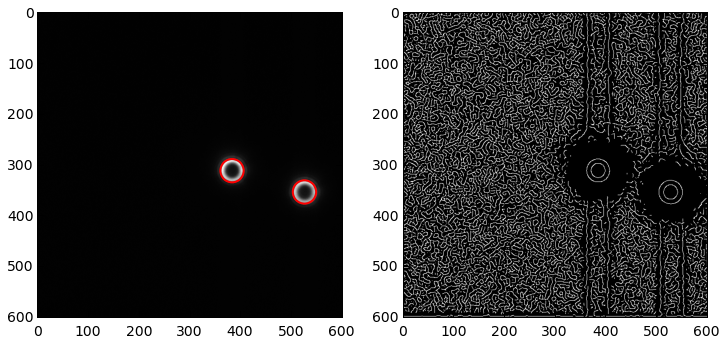

In [18]:
frame = 0

sigma = 3
low_threshold = 0.2
high_threshold = 0.8
min_radius = 20
max_radius = 30
threshold = 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax.imshow(images[frame], cmap='gray')
features, edges_image = detectors.hough_transform(images[frame], sigma, low_threshold, high_threshold, min_radius, max_radius, threshold)

ax1.imshow(images[frame], cmap='gray')
ax2.imshow(edges_image, cmap='gray')

for idx, f in features.iterrows():
    ax1.add_patch(plt.Circle((f['x'], f['y']), f['radius'], fill=False, ec='r', lw=2))